<a href="https://colab.research.google.com/github/sayem1997/AIPII/blob/master/Assignments/Quiz_problem_definition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz: Food MNIST classification

In [1]:
##Download datasets
!git clone https://github.com/srohit0/food_mnist.git

fatal: destination path 'food_mnist' already exists and is not an empty directory.


## Problem 1: Load Data

In [2]:
import food_mnist

import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models, optimizers
import numpy as np


Using TensorFlow backend.


In [0]:
#Load Food Mnist data 
#comment: mnist data use "mnist.load_data()" for loading data
img_rows, img_cols, img_channels = 56, 56, 3
(x_train, y_train), (x_test, y_test) = food_mnist.load_data(img_rows, img_cols)

## Problem 2: Preprocessing


In [0]:
#Normalize and one-hot encoding for training
batch_size = 1000
num_classes = 10
epochs = 5
input_shape = (img_rows, img_cols, img_channels)
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)


x_train = x_train.astype('float16') / 255.0
x_test = x_test.astype('float16') / 255.0


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Problem 3: Build a model
Model is consisted of conv - maxpool - dropout - flatten - dense - dropout - dense

Filter size of convolution is 32 and kernel size is 3 by 3.

Maxpool size is 2 by 2.

Each dropout rate is 0.5

first hidden layer size is 512.

Each layer have relu activation function except last dense layer.

Last dense layer has softmax activation function.


In [0]:
#Using this hyperparameter build a model


batch_size = 1000
num_classes = 10
epochs = 5

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, img_channels)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))



## Problem 4: Training
loss function is categorical_crossentropy and it's optimizer is adamoptimizer or sgd.(adamoptimizer get better result)

In [9]:
#Training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(x_test, y_test), verbose=1)

Train on 3750 samples, validate on 1250 samples
Epoch 1/5
3750/3750 [==============================] - 13s 3ms/step - loss: 2.3025 - accuracy: 0.1109 - val_loss: 2.2989 - val_accuracy: 0.1936
Epoch 2/5
3750/3750 [==============================] - 12s 3ms/step - loss: 2.2969 - accuracy: 0.1637 - val_loss: 2.2903 - val_accuracy: 0.2112
Epoch 3/5
3750/3750 [==============================] - 12s 3ms/step - loss: 2.2878 - accuracy: 0.1755 - val_loss: 2.2785 - val_accuracy: 0.2160
Epoch 4/5
3750/3750 [==============================] - 12s 3ms/step - loss: 2.2772 - accuracy: 0.1757 - val_loss: 2.2657 - val_accuracy: 0.1864
Epoch 5/5
3750/3750 [==============================] - 12s 3ms/step - loss: 2.2650 - accuracy: 0.1688 - val_loss: 2.2461 - val_accuracy: 0.2176


## Problem 5: Evaluation and printing result

In [10]:
#Evaluation
score = model.evaluate(x_train, y_train, batch_size=batch_size, verbose=1)

3750/3750 [==============================] - 3s 896us/step


In [11]:
#print result
print('test_loss: ', score[0])
print('test_accuracy: ', score[1])

test_loss:  2.249250650405884
test_accuracy:  0.2226666659116745


## Additional points: if you make a plot about test loss and test accuracy

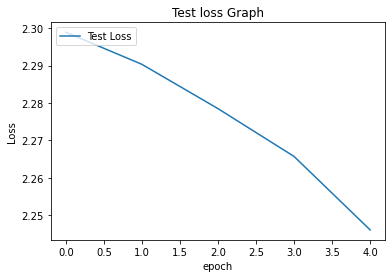

In [12]:
#Test loss
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

plt.title('Test loss Graph')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Test Loss'], loc='upper left')
plt.show()

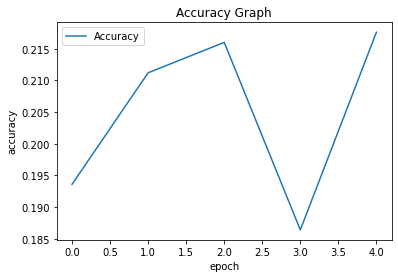

In [13]:
#test accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', ], loc='upper left')
plt.show()